In [16]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
%matplotlib inline
import xarray as xr
from scipy.interpolate import interp1d

[]

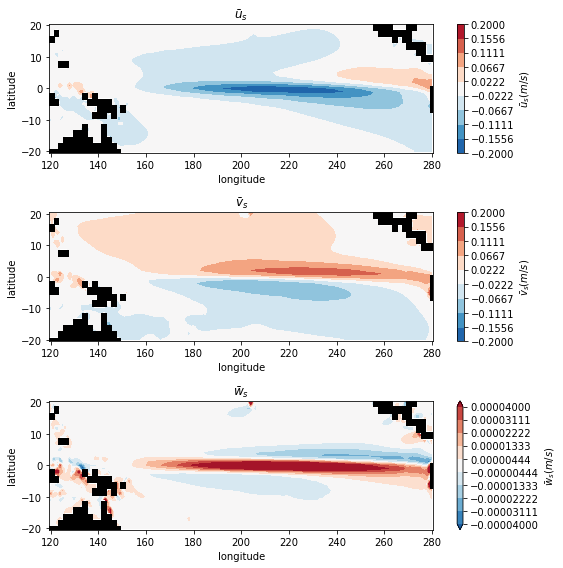

In [24]:
ds  = xr.open_dataset('data/uvws.nc')
dsm = xr.open_dataset('data/h20clim.nc').sel(Y=slice(-20,20))
usm = ds.us + dsm.mask
ds['usm'] = usm
vsm = ds.vs + dsm.mask
ds['vsm'] = vsm
wsm = ds.ws + dsm.mask
ds['wsm'] = wsm

plt.figure(figsize=(8,8))

plt.subplot(311)
dp = ds.usm.plot.contourf(levels=10,cmap="RdBu_r",vmin=-.2,vmax=.2,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$\bar u_s$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$\bar u_s (m/s)$', rotation=90) 
plt.subplot(312)
dp = ds.vsm.plot.contourf(levels=10,cmap="RdBu_r",vmin=-.2,vmax=.2,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$\bar v_s$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$\bar v_s (m/s)$', rotation=90) 
plt.subplot(313)
dp = ds.wsm.plot.contourf(levels=10,cmap="RdBu_r",vmin=-4e-5,vmax=4e-5,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$\bar w_s$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$\bar w_s (m/s)$', rotation=90) 
plt.tight_layout()
plt.savefig('uvs-clim.eps', format='eps', dpi=1000)
plt.plot()

[]

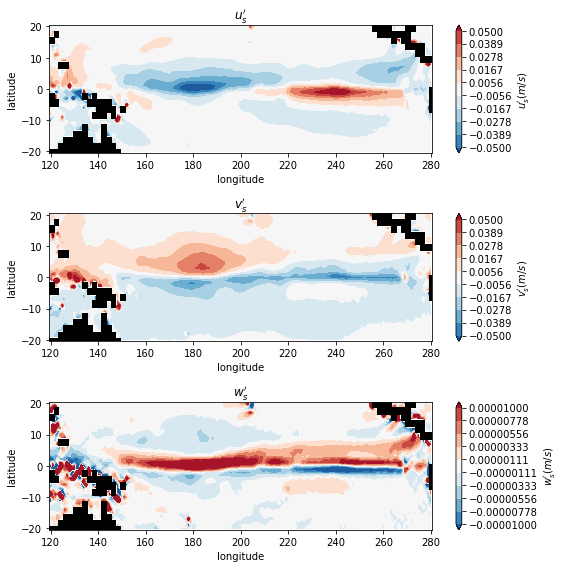

In [25]:
dst = xr.open_dataset('data/uvws-trend.nc')
usm = dst.us + dsm.mask
dst['usm'] = usm
vsm = dst.vs + dsm.mask
dst['vsm'] = vsm
wsm = dst.ws + dsm.mask
dst['wsm'] = wsm

plt.figure(figsize=(8,8))

plt.subplot(311)


dp = dst.usm.plot.contourf(levels=10,cmap='RdBu_r',vmin=-.05,vmax=.05,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$u_s^{\prime}$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$u_s^{\prime} (m/s)$', rotation=90) 
plt.subplot(312)

dp = dst.vsm.plot.contourf(levels=10,cmap="RdBu_r",vmin=-.05,vmax=.05,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$v_s^{\prime}$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$v_s^{\prime} (m/s)$', rotation=90) 
plt.subplot(313)

dp = dst.wsm.plot.contourf(levels=10,cmap="RdBu_r",vmin=-1e-5,vmax=1e-5,add_colorbar=0)
dp2 = dsm.mask.plot.pcolormesh(vmin=-10,vmax=-1,add_colorbar=0)
dp2.cmap.set_bad('black',1);dp2.cmap.set_over('white',0)
plt.title(r'$w_s^{\prime}$')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$w_s^{\prime} (m/s)$', rotation=90) 
plt.tight_layout()
plt.savefig('uvs-trend.eps', format='eps', dpi=1000)
plt.plot()